In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving monthly-sales.xlsx to monthly-sales (1).xlsx


In [ ]:
df=pd.read_excel('monthly-sales.xlsx')
df.head(5)

,Month,Monthly Sales
0,2008-01,154000
1,2008-02,96000
2,2008-03,73000
3,2008-04,51000
4,2008-05,53000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          69 non-null     object
 1   Monthly Sales  69 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
df.describe

<bound method NDFrame.describe of       Month  Monthly Sales
0   2008-01         154000
1   2008-02          96000
2   2008-03          73000
3   2008-04          51000
4   2008-05          53000
..      ...            ...
64  2013-05         231000
65  2013-06         271000
66  2013-07         329000
67  2013-08         401000
68  2013-09         553000

[69 rows x 2 columns]>

In [ ]:
df.columns

Index(['Month', 'Monthly Sales'], dtype='object')

Train & Test records: In preparation for construction of a predictive models, I have filtered out the last 4 records (from 2013-06 to 2013-09), as a holdout sample so that I can check the accuracy of my model to forecast predicted values against the actual values.

In [ ]:
df = df.set_index('Month')  # Set the time variable as an index
df.index =  pd.date_range(start=df.index[0] , periods=len(df), freq='MS')

In [ ]:
df_train=df.iloc[:-4, :]
df_test=df.iloc[-4:, :]

df_train.index=pd.date_range(start=df_train.index[0]  , periods=len(df_train), freq='MS')
df_test.index=pd.date_range(start=df_test.index[0] ,periods=len(df_test) , freq='MS')

In [ ]:
df_train.shape,df_test.shape

((65, 1), (4, 1))

In [ ]:
df_test

,Monthly Sales
2013-06-01,271000
2013-07-01,329000
2013-08-01,401000
2013-09-01,553000


In [ ]:
df_train

,Monthly Sales
2008-01-01,154000
2008-02-01,96000
2008-03-01,73000
2008-04-01,51000
2008-05-01,53000
...,...
2013-01-01,613000
2013-02-01,392000
2013-03-01,330000
2013-04-01,322000


Data Exploration

    Visualize the Time Series
    Determine Trend, Seasonal, and Error components


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Time Series Plots of Sales Amount')

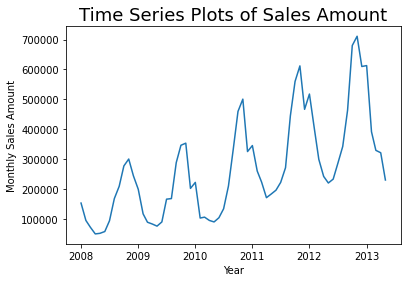

In [ ]:



fig, ax = plt.subplots()
ax.plot(df_train.index, df_train['Monthly Sales'])
ax.set_ylabel('Monthly Sales Amount')
ax.set_xlabel('Year')
ax.set_title('Time Series Plots of Sales Amount', size=18)

Time Series Plots of Sales Amount shows general movement of sales data. The monthly sales amount of the company is generally increasing over the time. For selecting forecasting methods, the time series can be broken down into systematic and unsystematic components. A time series is composed of three systematic components including 'level', 'trend', 'seasonality', and one non-systematic component called 'noise'. The four components can be either additively or multiplicatively combined. The components in our dataset can be visually evaluated through the decomposition plots in the next section. 

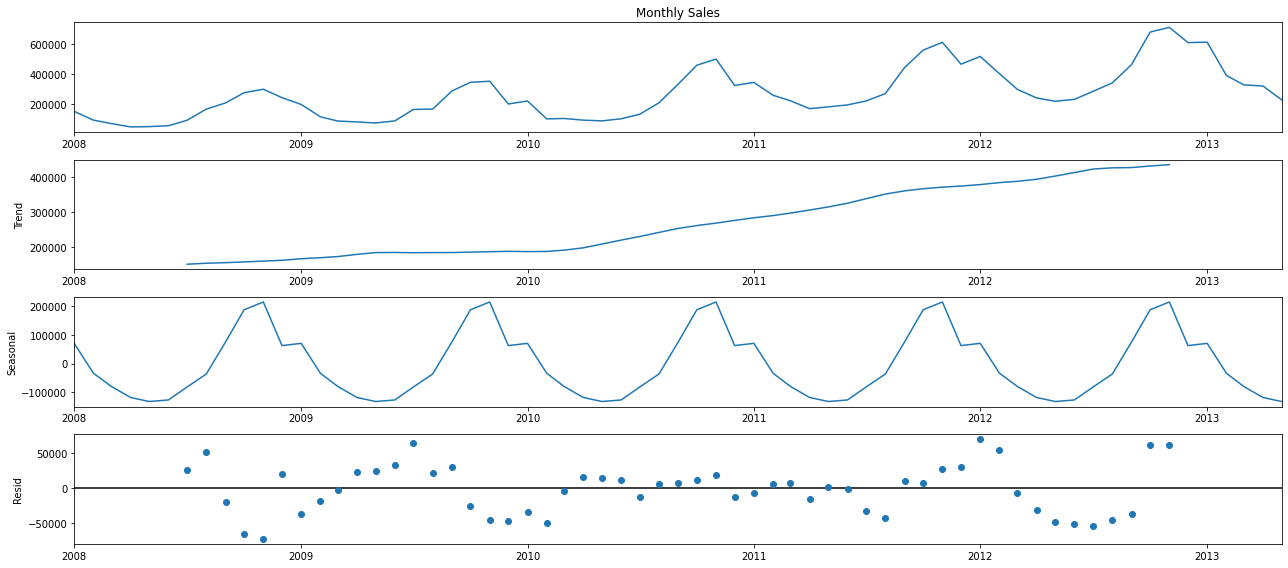

In [ ]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 8

decomposition = seasonal_decompose(df_train['Monthly Sales'], model = 'additive')
fig = decomposition.plot()
plt.show()



    The decomposition plot shows our time series broken down into its three components: trend, seasonal and the error. Each of these components makes up our time series and helps us confirm what we saw in our initial time series plot.

        The Trend line is confirmed that there is an upward trending.
        The Seasonality subplot shows that the regularly occurring spike in sales each year changes in magnitude, ever so slightly. Our dataset definitely contains seasonality, and this suggests that any ARIMA models used for analysis will need seasonal differencing. The change in magnitude suggests that any ETS models will use a multiplicative method in the seasonal component.
        The Error plot of the series presents a fluctuations between large and smaller errors as the time series goes on. Since the fluctuations are not consistent in magnitude then we will apply error in a multiplicative manner for any ETS models.



 Data Analysis


4.1. Build the Forecasting Models
4.2. Predict the Holdout Sample
4.3. Forecast for the next 4 months of sales

4.1. Build the Forecasting Models

In the previous section, I analyzed the decomposition graphs to inform forecasting models on the business problem. In this section, I determine the appropriate measurements to apply to the ETS model and the (Seasonal) ARIMA. Then I compare both models based on in-sample errors.

4.1.1. ETS Models
4.1.2. Seasonal ARIMA
4.1.1. ETS Models

ETS stands for Error, Trend, and Seasonality, and are the three inputs in ETS models. From the decomposition plot, we can obtain the necessary information to define the terms for the ETS model.

    The Trend line exhibits linear behavior so we will use an additive method.
    The Seasonality changes in magnitude each year so a multiplicative method seems necessary.
    The Error changes in magnitude as the series goes along so a multiplicative method will be used.
    This leaves us with an ETS(M, A, M) model.



In [ ]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

In [ ]:
pip install statsmodels

In [ ]:
pip install --upgrade --no-deps statsmodels

     |████████████████████████████████| 9.8 MB 4.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
pip uninstall statsmodels

Found existing installation: statsmodels 0.13.1
Uninstalling statsmodels-0.13.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.13.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.13.1


In [ ]:
pip install numpy scipy patsy pandas

In [ ]:
pip install statsmodels

  Using cached statsmodels-0.13.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


In [ ]:
from statsmodels.tsa.statespace.tools import _safe_cond

In [ ]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [ ]:
df_train = pd.Series(df_train['Monthly Sales']).astype('float64')
ets_model = ETSModel(df_train, error='mul', trend='add', seasonal = 'mul', 
                     damped_trend=True, seasonal_periods=12, initial_level=df_train.values.mean(), freq='MS')
ets_fitted = ets_model.fit()

In [ ]:
print(ets_fitted.summary())

                                 ETS Results                                  
Dep. Variable:          Monthly Sales   No. Observations:                   65
Model:                      ETS(MAdM)   Log Likelihood                -758.979
Date:                Mon, 13 Dec 2021   AIC                           1555.958
Time:                        06:09:21   BIC                           1597.272
Sample:                    01-01-2008   HQIC                          1572.259
                         - 05-01-2013   Scale                            0.017
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9999        nan        nan        nan         nan         nan
smoothing_trend      9.999e-05      0.047      0.002      0.998      -0.091       0.091
smoothing_season

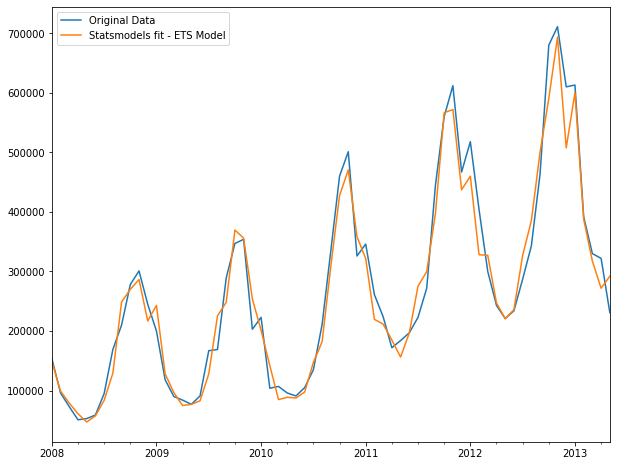

In [ ]:
plt.figure(figsize=(10,8))
df_train.plot(label='Original Data')
ets_fitted.fittedvalues.plot(label='Statsmodels fit - ETS Model')
plt.legend();

In [ ]:
pred_ets= ets_fitted.fittedvalues # Store the predicted values based on ETS model as "pred_ets"


Evaluating In-Sample Accuracy (ETS Models)

    Now, I describe the in-sample errors based on ETS models. The in-sample error measures give us a look at how well our model is able to predict future values. Among the various Error Terms, I chose:

        RMSE (Rooted Mean Squared Error)
        MAE (Mean Absolute Error)
        MAPE (Mean Absolute Percentage Error)
        MASE (Mean Absolute Scaled Error)

    



In [ ]:
expected_ets = df_train.values
predicted_ets = pred_ets.values

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

def mean_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true * 100)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def running_diff(arr, N):
    return np.array([arr[i] - arr[i-N] for i in range(N, len(arr))])

def mean_absolute_scaled_error(training_series, testing_series, prediction_series):
    errors_mean = np.abs(testing_series - prediction_series ).mean()
    d = np.abs(running_diff(training_series, 12) ).mean()
    return errors_mean/d

mse_ets  = mean_squared_error(expected_ets, predicted_ets)
rmse_ets = sqrt(mse_ets)
mae_ets  = mean_absolute_error(expected_ets, predicted_ets)
mpe_ets  = mean_percentage_error(expected_ets, predicted_ets)
mape_ets = mean_absolute_percentage_error(expected_ets, predicted_ets)
mase_ets = mean_absolute_scaled_error(expected_ets, expected_ets, predicted_ets)

print('In-Sample Error Measures of ETS Models:')
print('')
print('- RMSE: %.2f' % rmse_ets)
print('- MAE : %.2f' % mae_ets)
print('- MPE : %.2f' % mpe_ets)
print('- MAPE: %.2f' % mape_ets)
print('- MASE: %.2f' % mase_ets)

In-Sample Error Measures of ETS Models:

- RMSE: 33983.31
- MAE : 25891.56
- MPE : 0.63
- MAPE: 10.57
- MASE: 0.38


In [ ]:
# Augmented Dickey Fuller test
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_train.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.613050
p-value: 0.997896


By differencing data points, I make the time series stationary.

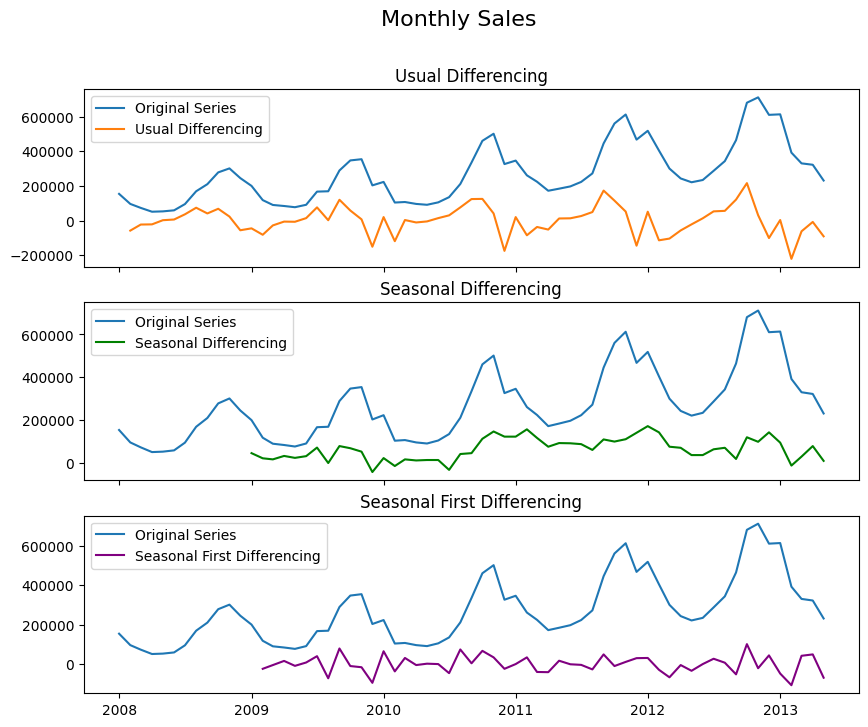

In [ ]:
# Plot
fig, axes = plt.subplots(3, 1, figsize=(10,8), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df_train, label='Original Series')
axes[0].plot(df_train.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)
df_diff = df_train.diff(1)

# Seasinal Dei
axes[1].plot(df_train, label='Original Series')
axes[1].plot(df_train.diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
axes[1].legend(loc='upper left', fontsize=10)

# Seasinal first differencing 
axes[2].plot(df_train, label='Original Series')
axes[2].plot(df_diff.diff(12), label='Seasonal First Differencing', color='purple')
axes[2].set_title('Seasonal First Differencing')
axes[2].legend(loc='upper left', fontsize=10)
plt.suptitle('Monthly Sales', fontsize=16)
plt.show()

In [ ]:
# Augmented Dickey Fuller test for Seasonal First Differencing Data 
seasonal_first_differencing = df_diff.diff(12)
result_seasonal_first_diff = adfuller(seasonal_first_differencing.dropna())
print('ADF Statistic for Seasonal First Differencing: %.4f' % result_seasonal_first_diff[0])
print('p-value for Seasonal First Differencing: %.4f' % result_seasonal_first_diff[1])

ADF Statistic for Seasonal First Differencing: -9.4464
p-value for Seasonal First Differencing: 0.0000


As you can see from the third plot, the original time series data is changed a stationary data after seasonal first differencing. This fact can be also confirmed by the p-value of Augmented Dickey Fuller test. Taking the seasonal first difference has now made our data stationary. Next, I find the optimal parameters based on the Time Series ACF and PACF graphs. 

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


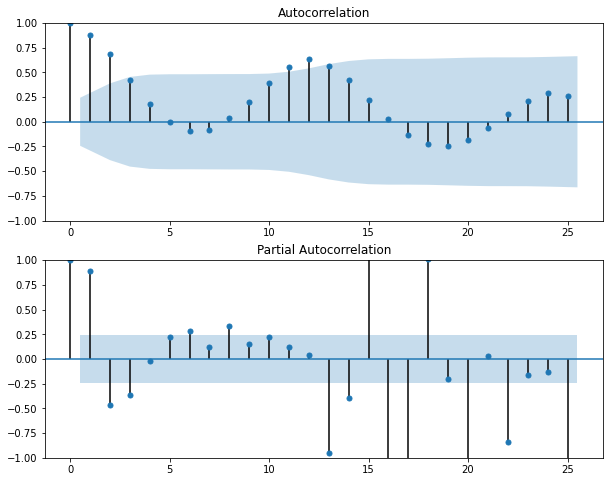

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig=plot_acf(df_train,  lags=25, ax=ax1)

ax2 = fig.add_subplot(212)
fig=plot_pacf(df_train, lags=25,  ax=ax2)

plt.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


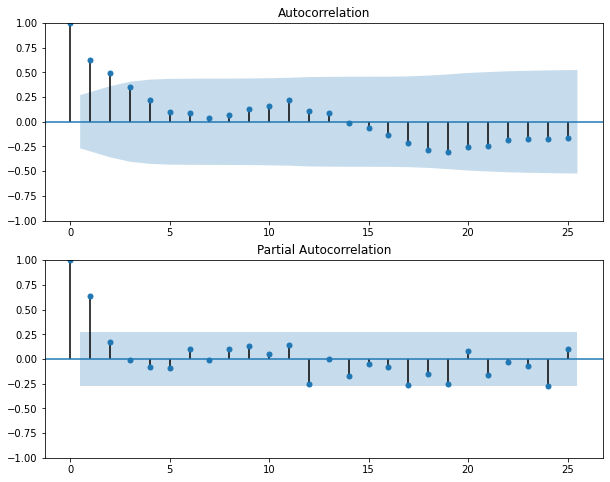

In [ ]:
seasonal_diff = running_diff(df_train, 12) 

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig=plot_acf(seasonal_diff, lags=25,  ax=ax1)

ax2 = fig.add_subplot(212)
fig=plot_pacf(seasonal_diff, lags=25,  ax=ax2)


## The seasonal difference presents similar ACF and PACF patterns as the initial plots, without differencing, only slightly less correlated. In order to remove correlation we will need to difference further.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


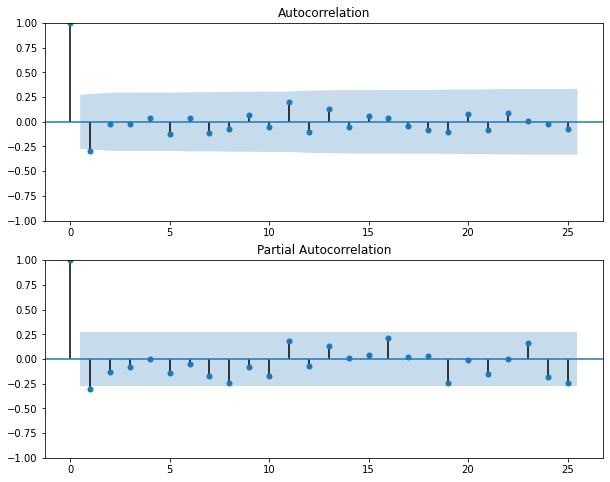

In [ ]:
seasonal_diff_1 = running_diff(seasonal_diff, 1) 

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig=plot_acf(seasonal_diff_1, lags=25,  ax=ax1)

ax2 = fig.add_subplot(212)
fig=plot_pacf(seasonal_diff_1, lags=25,  ax=ax2)


Therefore, the model terms for my ARIMA model are: ARIMA(0, 1, 1)(0, 1, 0)[12]. Note that the ACF and PACF results for the ARIMA(0, 1, 1)(0, 1, 0)[12] model shows no significantly correlated lags suggesting no need for adding additional AR() or MA() terms.

In [ ]:
# Define model
model = sm.tsa.statespace.SARIMAX(endog = df_train, 
                                         order=(0, 1, 1), seasonal_order=(0,1,0,12), 
                                         trend = 't', freq = 'MS',
                                         seasonal_periods =12, 
                                         enforce_stationarity=False, 
                                         enforce_invertibility=False)
# FIt Model
result = model.fit(dynamic=False)
print(result.summary())

                                      SARIMAX Results                                      
Dep. Variable:                       Monthly Sales   No. Observations:                   65
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -602.879
Date:                             Mon, 13 Dec 2021   AIC                           1211.757
Time:                                     06:42:28   BIC                           1217.493
Sample:                                 01-01-2008   HQIC                          1213.942
                                      - 05-01-2013                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift        -22.1131     83.683     -0.264      0.792    -186.128     141.902
ma.L1         -0.3884      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dynamic. After release 0.14, this will raise.
  FutureWarning


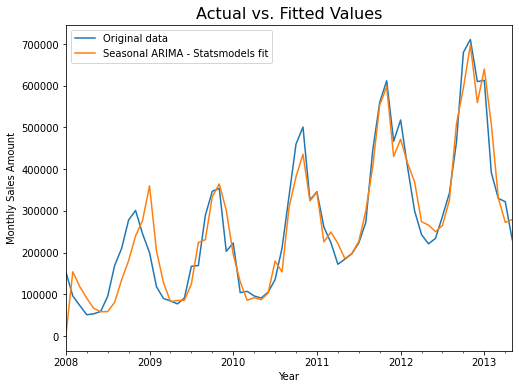

In [ ]:
# Compare the Original Time Series and Fitted values 
df_train.plot(label='Original data',figsize=(8,6))
result.fittedvalues.plot(label='Seasonal ARIMA - Statsmodels fit')
plt.ylabel("Monthly Sales Amount");
plt.xlabel("Year")
plt.title('Actual vs. Fitted Values', fontsize= 16)
plt.legend();

In [ ]:
predicted_sarima = result.predict().values
expected_sarima = df_train.values

mse_sarima  = mean_squared_error(expected_sarima, predicted_sarima)
rmse_sarima = sqrt(mse_sarima)
mae_sarima  = mean_absolute_error(expected_sarima, predicted_sarima)
mpe_sarima  = mean_percentage_error(expected_sarima, predicted_sarima)
mape_sarima = mean_absolute_percentage_error(expected_sarima, predicted_sarima)
mase_sarima = mean_absolute_scaled_error(expected_sarima, expected_sarima, predicted_sarima)

print('In-Sample Error Measures of Seasonal ARIMA Models:')
print(' ')
print('- RMSE : %f' % rmse_sarima)
print('- MAE  : %f' % mae_sarima)
print('- MPE  : %f' % mpe_sarima)
print('- MAPE : %f' % mape_sarima)
print('- MASE : %f' % mase_sarima)

In-Sample Error Measures of Seasonal ARIMA Models:
 
- RMSE : 52807.840842
- MAE  : 39576.055462
- MPE  : -3.478532
- MAPE : 20.196629
- MASE : 0.577355


So far, I have analysed the training part of time series data using ETS Models and Seasonal ARIMA. Then I compared the performance of each model with In-Sample Error Measures such as RMSE, MAPE and MASE. When comparing the two in-sample error measures we used, the ETS model does have a much narrower standard deviation(RMSE). Though the MASE value of ETS model is lower than that of Seasonal ARIMA, both are below 1.00, the generally accepted MASE threshold for model accuracy.
Next, I compare the prediction performance of both models using holdout samples.

In [ ]:
# ETS Model for Validation 
sales_data = pd.Series(df['Monthly Sales']).astype('float64')
ets_model_holdout = ETSModel(sales_data, error='mul', trend='add', seasonal = 'mul', 
                             damped_trend=True, seasonal_periods=12, 
                             initial_level=df_train.values.mean(), freq='MS')
ets_fitted_holdout = ets_model_holdout.fit()

In [ ]:
# Predicted values for holdout samples (test samples) - ETS model 
ets_fitted_holdout.predict()[-4:]

2013-06-01    250576.653734
2013-07-01    371512.903307
2013-08-01    435705.918289
2013-09-01    580163.084450
Freq: MS, dtype: float64

In [ ]:
# Seasonal ARIMA Model for Validation
model_sarima_holdout = sm.tsa.statespace.SARIMAX(endog = df, 
                                                 order=(0, 1, 1), seasonal_order=(0,1,0,12), 
                                                 trend = 't', freq = 'MS',
                                                 seasonal_periods =12, 
                                                 enforce_stationarity=False, 
                                                 enforce_invertibility=False)
sarima_fitted_holdout = model_sarima_holdout.fit(dynamic=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dynamic. After release 0.14, this will raise.
  FutureWarning


In [ ]:
# Predicted values for holdout samples (test samples) - Seasonal ARIMA model
sarima_fitted_holdout.predict()[-4:]

2013-06-01    265077.673470
2013-07-01    322917.680752
2013-08-01    383874.673687
2013-09-01    516710.170400
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
holdout_results = pd.DataFrame({'actual': df_test['Monthly Sales'], 
                                 'predicted_ETS': ets_fitted_holdout.predict()[-4:].values, 
                                 'predicted_ARIMA': sarima_fitted_holdout.predict()[-4:].values }, 
                               index = df_test.index) 
holdout_results

,actual,predicted_ETS,predicted_ARIMA
2013-06-01,271000,250576.653734,265077.673470
2013-07-01,329000,371512.903307,322917.680752
2013-08-01,401000,435705.918289,383874.673687
2013-09-01,553000,580163.084450,516710.170400


In [ ]:
 #Holdout-Sample Errors Comparison
# ETS Model 
mse_ets_hos  = mean_squared_error(df_test['Monthly Sales'], holdout_results['predicted_ETS'])
rmse_ets_hos = sqrt(mse_ets_hos)
mae_ets_hos  = mean_absolute_error(df_test['Monthly Sales'], holdout_results['predicted_ETS'])
mpe_ets_hos  = mean_percentage_error(df_test['Monthly Sales'], holdout_results['predicted_ETS'])
mape_ets_hos = mean_absolute_percentage_error(df_test['Monthly Sales'], holdout_results['predicted_ETS'])
mase_ets_hos = mean_absolute_scaled_error(df_train.values, df_test['Monthly Sales'], holdout_results['predicted_ETS'])

print('Holdout-Sample Error Measures of ETS Models:')
print(' ')
print('- RMSE : %.3f' % rmse_ets_hos)
print('- MAE  : %.3f' % mae_ets_hos)
print('- MPE  : %.3f' % mpe_ets_hos)
print('- MAPE : %.3f' % mape_ets_hos)
print('- MASE : %.3f' % mase_ets_hos)
print(' ')
# (Seasonal) ARIMA Model
mse_sarima_hos  = mean_squared_error(df_test['Monthly Sales'], holdout_results['predicted_ARIMA'])
rmse_sarima_hos = sqrt(mse_sarima_hos)
mae_sarima_hos  = mean_absolute_error(df_test['Monthly Sales'],  holdout_results['predicted_ARIMA'])
mpe_sarima_hos  = mean_percentage_error(df_test['Monthly Sales'],  holdout_results['predicted_ARIMA'])
mape_sarima_hos = mean_absolute_percentage_error(df_test['Monthly Sales'],  holdout_results['predicted_ARIMA'])
mase_sarima_hos = mean_absolute_scaled_error(df_train.values, df_test['Monthly Sales'],  holdout_results['predicted_ARIMA'])
print(' ')
print('Holdout-Sample Error Measures of Seasonal ARIMA Models:')
print(' ')
print('- RMSE : %.3f' % rmse_sarima_hos)
print('- MAE  : %.3f' % mae_sarima_hos)
print('- MPE  : %.3f' % mpe_sarima_hos)
print('- MAPE : %.3f' % mape_sarima_hos)
print('- MASE : %.3f' % mase_sarima_hos)

Holdout-Sample Error Measures of ETS Models:
 
- RMSE : 32275.354
- MAE  : 31201.313
- MPE  : -4.738
- MAPE : 8.506
- MASE : 0.455
 
 
Holdout-Sample Error Measures of Seasonal ARIMA Models:
 
- RMSE : 20507.908
- MAE  : 16354.950
- MPE  : 3.717
- MAPE : 3.717
- MASE : 0.239


When looking at the model's ability to predict the holdout sample, we can recognize that the Seasonal ARIMA model shows better predictive performance in all metrics.

Forecast for the next 4 months of Sales

Previously, I concluded that the Seasonal ARIMA model shows better performance in terms of prediction. Now, I forecast for the next four-month sales using all the time series data based on the same Seasonal ARIMA model. First, I diagnose the stationarity of the whole time series data again. Then the forecast results are calculated using 95% and 80% confidence intervals.


In [ ]:
# Seasonal ARIMA Model for Forecasting 
model_sarima_final = sm.tsa.statespace.SARIMAX(df, order=(0, 1, 1), 
                                             seasonal_order=(0,1,0,12), trend = 't', 
                                             seasonal_periods =12, 
                                             enforce_stationarity=False, enforce_invertibility=False)
# FIt Model
sarima_fitted_final = model_sarima_final.fit(dynamic=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dynamic. After release 0.14, this will raise.
  FutureWarning


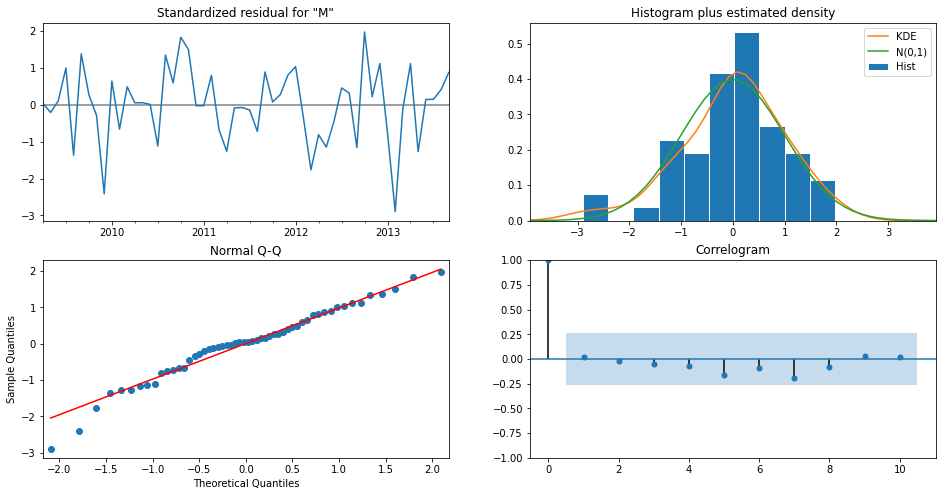

In [ ]:
sarima_fitted_final.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
# Forecast the nest 4 periods of Sales Amount
fcast = sarima_fitted_final.get_forecast(4)
forecast_results = pd.DataFrame({'forecast_mean': fcast.predicted_mean, 
                                 'forecast_high_95': fcast.conf_int(alpha= 0.05).iloc[:,1], 
                                 'forecast_high_80': fcast.conf_int(alpha= 0.20).iloc[:,1], 
                                 'forecast_low_80': fcast.conf_int(alpha= 0.20).iloc[:,0], 
                                 'forecast_low_95': fcast.conf_int(alpha= 0.05).iloc[:,0], 
                                }) 
forecast_results.index = pd.date_range(start=forecast_results.index[0] , periods=len(forecast_results), freq='MS')
forecast_results

,forecast_mean,forecast_high_95,forecast_high_80,forecast_low_80,forecast_low_95
2013-10-01,756469.982846,837662.052687,809558.623778,703381.341914,675277.913005
2013-11-01,788700.836876,884287.127323,851201.352770,726200.320981,693114.546428
2013-12-01,688949.274534,797029.456057,759619.106698,618279.442370,580869.093011
2014-01-01,693215.295822,812487.724969,771203.345350,615227.246294,573942.866675


Text(0.5, 1.0, 'Actual and Forecast Values')

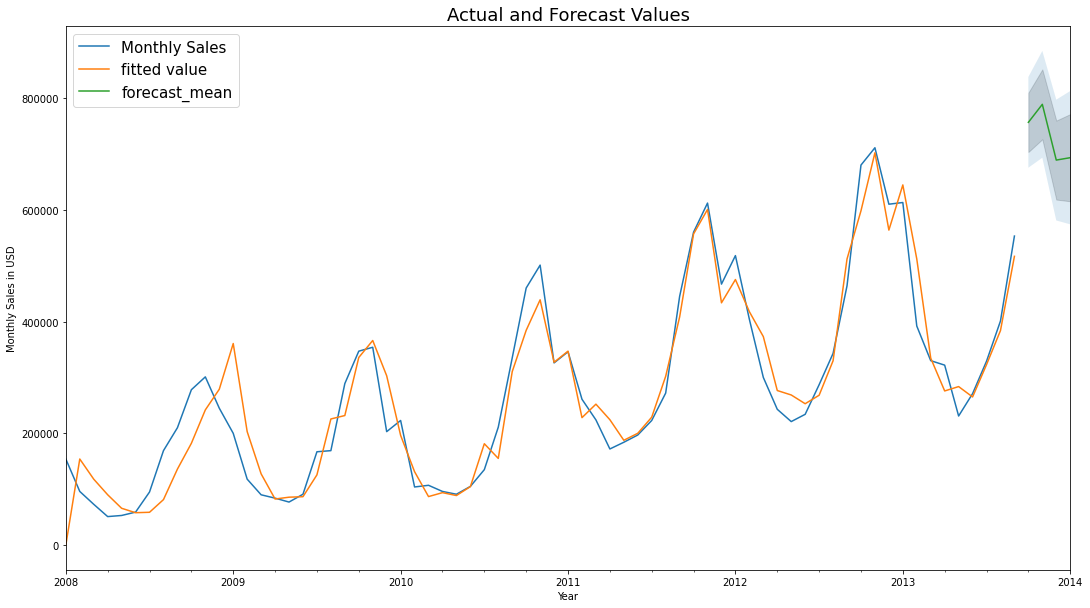

In [ ]:
# Visualize the forecast results 
df.plot(figsize=(18,10))
sarima_fitted_final.fittedvalues.plot(label = 'fitted value')
forecast_results.forecast_mean.plot()
upper_series_80 = forecast_results.forecast_high_80
lower_series_80 = forecast_results.forecast_low_80
upper_series_95 = forecast_results.forecast_high_95
lower_series_95 = forecast_results.forecast_low_95

plt.fill_between(upper_series_80.index, 
                 lower_series_80, 
                 upper_series_80, 
                 color='k', alpha=.15)

plt.fill_between(lower_series_95.index, 
                 lower_series_95, 
                 upper_series_95, 
                 color= None, linestyle ='--', alpha=.15)
plt.legend(loc = 'upper left', fontsize =15)
plt.xlabel('Year')
plt.ylabel('Monthly Sales in USD')
plt.title('Actual and Forecast Values', fontsize = 18)

This analysis is mainly about forecasting for upcoming sales in a video game company. Firstly, I investigate and prepare the time series data. The provided data was appropriate to use time series models and I held out the last 4 periods of data points for validation. Then, I determined Trend, Seasonal and Error components in the data based on decomposition plots. After that, I analyse the data by applying the ARIMA and ETS models and describe the errors for both models. I compared the in-sample error measurements to both models and compare error measurements for the holdout sample in the forecast. Finally,I choose the best fitting model and forecast the next four periods. 